# Exploratory Data Analysis

## Config

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('--- Loading the Season Master ---')

LOCAL_DATA_DIR = "archive_data/2024-25"
LOCAL_DATA_FILE = "merged_gw_data.csv"
LOCAL_DATA_PATH = os.path.join(LOCAL_DATA_DIR, LOCAL_DATA_FILE)

print(f"Loading data from: {LOCAL_DATA_PATH}")
df_fpl = pd.read_csv(LOCAL_DATA_PATH)
display(df_fpl.head())
print(f"\n{len(df_fpl)} rows loaded")

print('\n--- Loading the Player Summaries ---')

LOCAL_PLAYER_FILE = "player_summaries.csv"
LOCAL_PLAYER_PATH = os.path.join(LOCAL_DATA_DIR, LOCAL_PLAYER_FILE)

print(f"Loading data from: {LOCAL_PLAYER_PATH}")
df_player_summary = pd.read_csv(LOCAL_PLAYER_PATH)
display(df_player_summary.head())
print(f"\n{len(df_player_summary)} rows loaded")

--- Loading the Season Master ---
Loading data from: archive_data/2024-25/merged_gw_data.csv


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gameweek
0,Alex Scott,MID,Bournemouth,1.6,0,0,11,0,12.8,77,...,1,0.0,2,0,0,0,50,False,0,1
1,Carlos Miguel dos Santos Pereira,GK,Nott'm Forest,2.2,0,0,0,0,0.0,427,...,1,0.0,0,0,0,0,45,True,0,1
2,Tomiyasu Takehiro,DEF,Arsenal,0.0,0,0,0,0,0.0,22,...,2,0.0,0,0,0,0,50,True,0,1
3,Malcolm Ebiowei,MID,Crystal Palace,0.0,0,0,0,0,0.0,197,...,2,0.0,0,0,0,0,45,False,0,1
4,Ben Brereton Díaz,MID,Southampton,1.0,0,0,-2,0,14.0,584,...,1,16.0,1,0,0,0,55,False,1,1



27605 rows loaded

--- Loading the Player Summaries ---
Loading data from: archive_data/2024-25/player_summaries.csv


,assists,birth_date,bonus,bps,can_select,can_transact,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,clean_sheets_per_90,...,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
0,0,NaN,0,0,False,True,0.0,0.0,0,0.00,...,341,0,439,0,2825,0,0.0,0.0,Fábio Vieira,0
1,2,1997-04-03,6,152,False,True,0.0,0.0,2,0.30,...,32,42,1238437,0,1409940,0,0.0,6.5,G.Jesus,4
2,2,1997-12-19,9,459,False,True,0.0,0.0,10,0.38,...,11,117,5093448,0,5431768,0,0.0,19.2,Gabriel,4
3,3,1999-06-11,14,343,False,True,100.0,100.0,7,0.34,...,15,97,2644355,0,3530099,0,0.0,12.6,Havertz,5
4,0,NaN,0,0,False,True,0.0,0.0,0,0.00,...,38,0,0,0,4643,0,0.0,0.0,Hein,0



804 rows loaded


## Initial Inspection/Visuals

In [3]:
print("--- Basic DataFrame Information | Master ---")
print("\nDataFrame Info:")
df_fpl.info()

print("\nMissing Values per Column:")
display(df_fpl.isnull().sum()[df_fpl.isnull().sum() > 0].sort_values(ascending=False))

print("\nColumn Names:")
print(df_fpl.columns.tolist())

print("\n--- Basic DataFrame Information | Players ---")
print("\nDataFrame Info:")
df_player_summary.info()

print("\nMissing Values per Column:")
display(df_player_summary.isnull().sum()[df_player_summary.isnull().sum() > 0].sort_values(ascending=False))

print("\nColumn Names:")
print(df_player_summary.columns.tolist())

--- Basic DataFrame Information | Master ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        27605 non-null  object 
 1   position                    27605 non-null  object 
 2   team                        27605 non-null  object 
 3   xP                          27605 non-null  float64
 4   assists                     27605 non-null  int64  
 5   bonus                       27605 non-null  int64  
 6   bps                         27605 non-null  int64  
 7   clean_sheets                27605 non-null  int64  
 8   creativity                  27605 non-null  float64
 9   element                     27605 non-null  int64  
 10  expected_assists            27605 non-null  float64
 11  expected_goal_involvements  27605 non-null  float64
 12  expected_goals            

mng_clean_sheets     14178
mng_draw             14178
mng_goals_scored     14178
mng_loss             14178
mng_underdog_draw    14178
mng_underdog_win     14178
mng_win              14178
dtype: int64


Column Names:
['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes', 'mng_clean_sheets', 'mng_draw', 'mng_goals_scored', 'mng_loss', 'mng_underdog_draw', 'mng_underdog_win', 'mng_win', 'modified', 'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves', 'selected', 'starts', 'team_a_score', 'team_h_score', 'threat', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards', 'gameweek']

--- Basic DataFrame Information | Players ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Columns: 103 entries, assists to yellow_cards
dtypes: bool(6), float64(33), int64(54), object(10)
memory usage: 614.1+ KB

Missing Values per 

corners_and_indirect_freekicks_text     804
direct_freekicks_text                   804
squad_number                            804
penalties_text                          804
penalties_order                         754
direct_freekicks_order                  739
corners_and_indirect_freekicks_order    729
news                                    561
news_added                              201
chance_of_playing_next_round            201
chance_of_playing_this_round            201
birth_date                              162
team_join_date                           99
region                                   98
ep_next                                   3
dtype: int64


Column Names:
['assists', 'birth_date', 'bonus', 'bps', 'can_select', 'can_transact', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'clean_sheets', 'clean_sheets_per_90', 'code', 'corners_and_indirect_freekicks_order', 'corners_and_indirect_freekicks_text', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'creativity', 'creativity_rank', 'creativity_rank_type', 'direct_freekicks_order', 'direct_freekicks_text', 'dreamteam_count', 'element_type', 'ep_next', 'ep_this', 'event_points', 'expected_assists', 'expected_assists_per_90', 'expected_goal_involvements', 'expected_goal_involvements_per_90', 'expected_goals', 'expected_goals_conceded', 'expected_goals_conceded_per_90', 'expected_goals_per_90', 'first_name', 'form', 'form_rank', 'form_rank_type', 'goals_conceded', 'goals_conceded_per_90', 'goals_scored', 'has_temporary_code', 'ict_index', 'ict_index_rank', 'ict_index_rank_type', 'id', 'in_dreamteam', 'influence', 'influe


--- Top 20 Points Scorers for 2024-25 ---


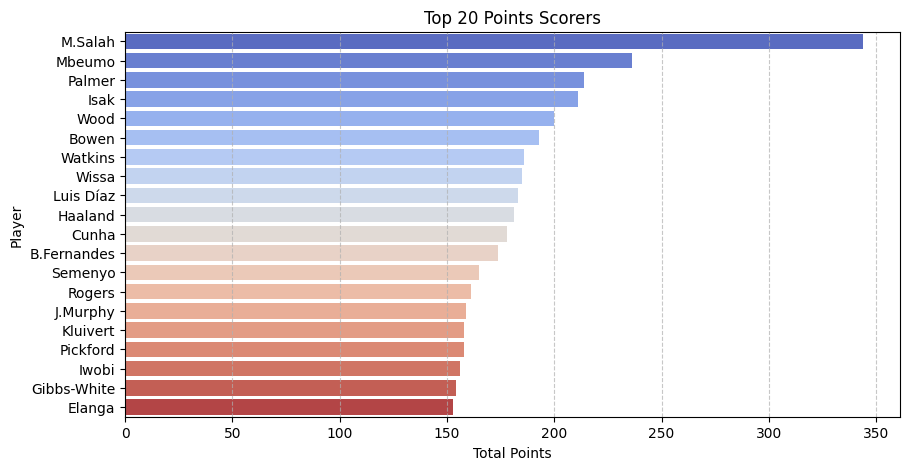

In [4]:
print("\n--- Top 20 Points Scorers for 2024-25 ---")

top_20_points = df_player_summary.sort_values(by='total_points', ascending=False)[:20]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_20_points['total_points'], y=top_20_points['web_name'], palette='coolwarm', hue=top_20_points['web_name'], legend=False)
plt.title("Top 20 Points Scorers")
plt.ylabel('Player')
plt.xlabel('Total Points')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


--- Player Final Cost vs Total Points Scored ---


<Figure size 1000x1000 with 0 Axes>

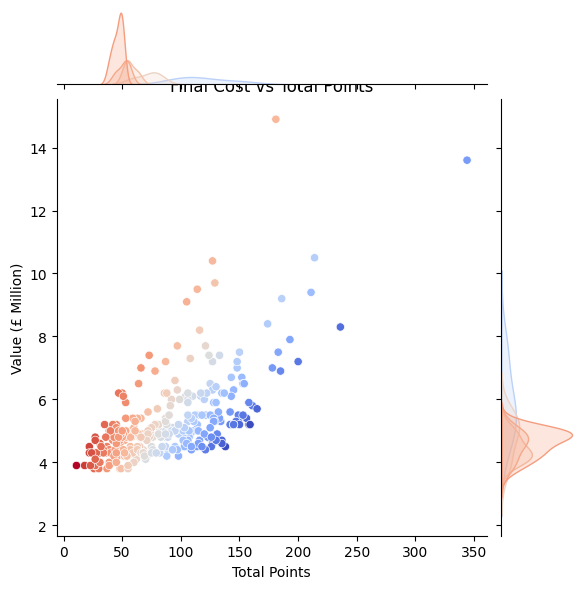

In [24]:
print("\n--- Player Final Cost vs Total Points Scored ---")

df_plot_data = df_player_summary.copy()
df_plot_data['cost_in_m'] = df_player_summary['now_cost']/10
df_plot_data = df_plot_data[df_plot_data['minutes'] > 1000]
df_plot_data['points_per_mil'] = df_plot_data['total_points']/df_plot_data['cost_in_m']

plt.figure(figsize=(10, 10))
sns.jointplot(x='total_points', y='cost_in_m', data=df_plot_data, palette='coolwarm_r', hue='points_per_mil', legend=False)
plt.title('Final Cost vs Total Points')
plt.ylabel('Value (£ Million)')
plt.xlabel('Total Points')
plt.show()

In [18]:
print("--- Inspecting df_player_summary Columns ---")
print(df_player_summary.columns.tolist())

# Also, check if 'value' or 'now_cost' exist and show some sample data
if 'value' in df_player_summary.columns:
    print("\n'value' column found. Sample data:")
    print(df_player_summary['value'].head())
elif 'now_cost' in df_player_summary.columns:
    print("\n'now_cost' column found. Sample data:")
    print(df_player_summary['now_cost'].head())
else:
    print("\nNeither 'value' nor 'now_cost' column found in df_player_summary.")
    print("This is likely the cause of the error. We need to ensure a cost column is in your aggregated player data.")

--- Inspecting df_player_summary Columns ---
['assists', 'birth_date', 'bonus', 'bps', 'can_select', 'can_transact', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'clean_sheets', 'clean_sheets_per_90', 'code', 'corners_and_indirect_freekicks_order', 'corners_and_indirect_freekicks_text', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'creativity', 'creativity_rank', 'creativity_rank_type', 'direct_freekicks_order', 'direct_freekicks_text', 'dreamteam_count', 'element_type', 'ep_next', 'ep_this', 'event_points', 'expected_assists', 'expected_assists_per_90', 'expected_goal_involvements', 'expected_goal_involvements_per_90', 'expected_goals', 'expected_goals_conceded', 'expected_goals_conceded_per_90', 'expected_goals_per_90', 'first_name', 'form', 'form_rank', 'form_rank_type', 'goals_conceded', 'goals_conceded_per_90', 'goals_scored', 'has_temporary_code', 'ict_index', 'ict_index_rank', 'ict_index_rank_type', 'id', 'in_dr